<a href="https://colab.research.google.com/github/avreddy92/ores5160-2025/blob/main/week11/week11assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Q1. Reading the CSV File (pandas + csv)

	1.	Use the csv module to open and print the first 5 rows of est2018-pop-res.csv.

	2.	Then use pandas.read_csv() to load the same file into a DataFrame.

	•	Display the shape (rows × columns).

	•	Print the list of column names.

	3.	Which column represents total population? Display the top 5 most populous states


In [5]:
from google.colab import files
uploaded = files.upload()

Saving est2018-pop-res.psv to est2018-pop-res (1).psv
Saving patient.json to patient (1).json
Saving est2018-pop-res.csv to est2018-pop-res (1).csv


Q2. Basic Statistical Analysis (pandas)

	1.	Compute the average population across all states.

	2.	Find which region has the highest total population.

	3.	Plot a bar chart showing the population by region (use matplotlib)

Q3. Parsing the JSON File (FHIR structure)

Using json module:

	1.	Load patient.json into a Python dictionary.

	2.	Extract and print:

	•	Patient’s full official name

	•	Gender and birth date

	•	Current address (city, state, postal code)
  
	3.	Count how many phone numbers the patient has, and list their types (e.g., work, mobile, home).

In [6]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import json
import sys

# Change file names if your uploaded files differ
CSV_PATH = "est2018-pop-res.csv"
JSON_PATH = "patient.json"

In [7]:
# ----------------------------
# Q1. Reading the CSV File
# ----------------------------

def q1_csv_read_print(csv_path, n=5):
    print("Q1.1 — Using csv module: first", n, "rows")
    with open(csv_path, newline='', encoding='utf-8') as f:
        reader = csv.reader(f)
        for i, row in enumerate(reader):
            print(row)
            if i >= n - 1:
                break

def q1_pandas(csv_path):
    print("\nQ1.2 — Using pandas.read_csv()")
    df = pd.read_csv(csv_path)
    print("Shape:", df.shape)
    print("Columns:", list(df.columns))
    print(df.head())
    return df

def q1_top5(df):
    # Try common population column names
    pop_col = [c for c in df.columns if 'pop' in c.lower() or 'total' in c.lower()][0]
    print("\nQ1.3 — Using column for total population:", pop_col)
    df_sorted = df.sort_values(by=pop_col, ascending=False)
    top5 = df_sorted.head(5)
    print(top5[[pop_col]])
    return pop_col, top5

In [8]:
# ----------------------------
# Q2. Basic Statistical Analysis
# ----------------------------

def q2_stats(df, pop_col):
    print("\nQ2.1 — Average population:")
    avg_pop = df[pop_col].mean()
    print(round(avg_pop, 2))

    print("\nQ2.2 — Region with highest total population:")
    region_col = [c for c in df.columns if 'region' in c.lower()][0]
    totals = df.groupby(region_col)[pop_col].sum().sort_values(ascending=False)
    print(totals)
    top_region = totals.idxmax()
    print("Highest region:", top_region)

    print("\nQ2.3 — Plotting population by region:")
    totals.plot(kind='bar', figsize=(6,4), title='Population by Region')
    plt.ylabel("Population")
    plt.show()

In [9]:
# ----------------------------
# Q3. Parsing JSON (FHIR)
# ----------------------------

def q3_json(json_path):
    with open(json_path, 'r') as f:
        data = json.load(f)

    # Patient info
    name_data = data['name'][0]
    full_name = " ".join(name_data.get('given', [])) + " " + name_data.get('family', '')
    print("Full Name:", full_name)

    print("Gender:", data.get('gender'))
    print("Birth Date:", data.get('birthDate'))

    addr = data['address'][0]
    print("Address:", addr.get('city'), addr.get('state'), addr.get('postalCode'))

    phones = [t for t in data.get('telecom', []) if t.get('system') == 'phone']
    print("Phone count:", len(phones))
    print("Phone types:", [p.get('use') for p in phones])

Q1.1 — Using csv module: first 5 rows
['SUMLEV', 'REGION', 'DIVISION', 'STATE', 'NAME', 'POPESTIMATE2018', 'POPEST18PLUS2018', 'PCNT_POPEST18PLUS']
['010', '0', '0', '00', 'United States', '327167434', '253768092', '77.6']
['040', '3', '6', '01', 'Alabama', '4887871', '3798031', '77.7']
['040', '4', '9', '02', 'Alaska', '737438', '553622', '75.1']
['040', '4', '8', '04', 'Arizona', '7171646', '5528989', '77.1']

Q1.2 — Using pandas.read_csv()
Shape: (53, 8)
Columns: ['SUMLEV', 'REGION', 'DIVISION', 'STATE', 'NAME', 'POPESTIMATE2018', 'POPEST18PLUS2018', 'PCNT_POPEST18PLUS']
   SUMLEV REGION DIVISION  STATE           NAME  POPESTIMATE2018  \
0      10      0        0      0  United States        327167434   
1      40      3        6      1        Alabama          4887871   
2      40      4        9      2         Alaska           737438   
3      40      4        8      4        Arizona          7171646   
4      40      3        7      5       Arkansas          3013825   

   POPEST1

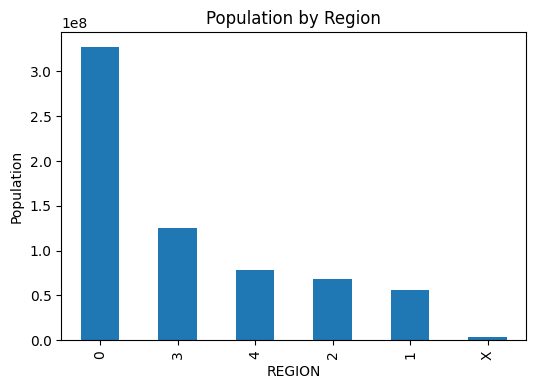

Full Name: Peter James Chalmers
Gender: male
Birth Date: 1974-12-25
Address: PleasantVille Vic 3999
Phone count: 3
Phone types: ['work', 'mobile', 'old']


In [10]:
# ----------------------------
# Main Flow
# ----------------------------

# Q1
q1_csv_read_print(CSV_PATH)
df = q1_pandas(CSV_PATH)
pop_col, top5 = q1_top5(df)

# Q2
q2_stats(df, pop_col)

# Q3
q3_json(JSON_PATH)